**Name: Debangshu Bhattacharya**

**Roll: MDS201910**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import numpy as np
import os
import json
import time
import re
import string
import random
import math
import torch
from tqdm import tqdm

### Read Covid data

Since, I only have the preprocessed corpus where I had removed every punctuations and converted every character to lower case, I need to reread the corpus (extracting text from json files) as for language model it is better to keep the original structure (punctuations and keep words beginning with capital letters as it is). So, in this section, I am rerunning that part of extracting json text as done in assignment 1. After extracting the corpus, I am keeping only the english documents in my corpus using the langdetect python module. This part is exactly the same as part 1 of assignment 1.  

In [ ]:
wd = os.path.join('My Drive/NLP/')
raw_data_dir = os.path.join(wd,'pdf_json')
files = os.listdir(raw_data_dir)

N = len(files)
print ("There are %d files in our covid dataset" %(N))

There are 56628 files in our covid dataset


In [ ]:
# Helper code to extract text from a json file (same as the one provided)
def extract_text(filepath,output_as_list=False):
    '''
    Extract the text from the file path and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - if output_as_list = True
                list of all the above values,
             else
                text of title, abstract and bodt_text
    '''

    file = open(filepath)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if available
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']

    file.close()
    
    if output_as_list:
            return [paper_id,title,abstract,body_text]
    else:
        return (title + ' ' + abstract + ' ' + body_text + ' ')

In [ ]:
def create_corpus(files):
  #function to create a text corpus for a given set of files as input. In the text corpus, each document will be represented as a text in each line. 
  n = len(files)
  corpus = ''

  for i, f in tqdm(enumerate(files)):
    filepath = os.path.join(raw_data_dir,f)
    text = extract_text(filepath)

    if i==(n-1):
      corpus = corpus + text
    else:
      corpus = corpus + text + '\n'
    
  return corpus

In [ ]:
def create_corpus_batch(files, batch_start,batch_size,N):
  #function to return a text corpus for a batch where the batch size and the document index with which the batch is starting is passed as arguments to the function
  batch_end = batch_start + batch_size
  if batch_end > N:
    batch_end = N
  
  batch_files = files[batch_start:batch_end]
  corpus_batch = create_corpus(batch_files)
  return corpus_batch

In [ ]:
from tqdm import tqdm
batch_size = 10000
current_start_ind = 0

corpus_batch1 = create_corpus_batch(files, batch_start = 0, batch_size = batch_size, N= N)

10000it [1:25:15,  1.95it/s]


In [ ]:
with open(os.path.join(wd, 'corpus_batch1.txt'),'w') as f:
  f.write(corpus_batch1)

In [ ]:
with open(os.path.join(wd, 'corpus_batch1.txt'),'r') as f:
  corpus = f.read()

print (corpus.split('\n')[0])
print (len(corpus.split('\n')))

Postweaning mortality in commercial swine production II: review of infectious contributing factors a Qualitative assignment of relative incidence and magnitude of mortality was performed by primary author (J.T.G.) based on summarization of published literature.b Relative incidence of mortality attributed to the infectious agent was denoted using a system ranging from + to +++. Infectious agents not currently in domestic swine populations in the United States was denoted by "−". c Relative magnitude of mortality in a population attributed to the presence of the infectious agent was described as + (low potential), ++ (moderate potential), and +++ (significant potential). d Caused by Brachyspira hyodysenteriae, Brachyspira hampsonii, and Brachyspira suanatina. e Including, but not limited to, African swine fever virus, classical swine fever virus, and foot and mouth disease. f Caused by Mycoplasma hyopneumoniae. g Includes PEDV, TGEV, and PDCoV. h Formerly Haemophilus parasuis. i Includes

In [ ]:
batch_size = 10000
current_start_ind = 0+batch_size

corpus_batch1 = create_corpus_batch(files, batch_start = current_start_ind, batch_size = batch_size, N= N)

10000it [53:35,  3.11it/s]


In [ ]:
print (len(corpus_batch1.split('\n')))
print (corpus_batch1.split('\n')[0])

10000
Molecular Epidemiology and Sequencing of the G-L Intergenic Region of RabiesViruses Isolated in China* A group of 25 rabies viruses (RABVs), recovered from 24 dogs and one human case, were collected from various areas in China between 2004 and 2006. Genetic and phylogenetic analyses of the G-L intergenic region were carried out in 25 street RABV isolates and CTN vaccine strains of 7generations. The study was based on the comparison of a 519 bp nucleotide sequence, encompassing the G-L intergenic region. The nucleotide sequence homologies of Chinese street strains were from 95.5% to 100%. The phylogenetic analysis showed that all Chinese isolates clearly supported the placement of all Chinese viruses in Lyssavirus genotype 1 and they were distributed according to their geographical origins. All of the Chinese strains were closely related but they could still be divided into two groups: group of street strains and group of CTN strains. This study presents details about the molecula

In [ ]:
with open(os.path.join(wd, 'corpus_batch2.txt'),'w') as f:
  f.write(corpus_batch1)

In [ ]:
batch_size = 10000
current_start_ind = 0+(2*batch_size)

corpus_batch1 = create_corpus_batch(files, batch_start = current_start_ind, batch_size = batch_size, N= N)

10000it [55:08,  3.02it/s]


In [ ]:
print (len(corpus_batch1.split('\n')))
print (corpus_batch1.split('\n')[0])

10000
 www.thelancet.com/hiv Published online May 28, 2020 https://doi. In the ongoing pandemic of COVID-19, nearly 5 million people have been diagnosed with severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) infection and more than 320 000 people have died. SARS-CoV-2 infection causes lymphopenia and immune-mediated cytokine storm syndrome, resulting in pathological changes in lungs, heart, liver, and other organs. 3 suggest that patients with HIV often have lower risks of infection and progress to severe disease, which might be because of suppression of coronavirus replication by antiretroviral therapy (ART), but longer duration of disease, which might be because of their status of immune suppression. People with HIV might be at an increased risk of SARS-CoV-2 infection or severe COVID-19, especially those with comorbidity, lower CD4 count, or high HIV RNA load. 4 By contrast, the immunosuppression and low CD4 count might protect HIV-1-infected individuals from developing t

In [ ]:
with open(os.path.join(wd, 'corpus_batch3.txt'),'w') as f:
  f.write(corpus_batch1)

In [ ]:
batch_size = 10000
current_start_ind = 0+(3*batch_size)

corpus_batch1 = create_corpus_batch(files, batch_start = current_start_ind, batch_size = batch_size, N= N)

10000it [53:25,  3.12it/s]


In [ ]:
print (len(corpus_batch1.split('\n')))
print (corpus_batch1.split('\n')[0])

10000
Prolonged RNA shedding of the 2019 novel coronavirus in an asymptomatic patient with a VP shunt Findings that shed new light on the possible pathogenesis of a disease or an adverse effect  A 33-year-old man with paranoid schizophrenia and a ventriculoperitoneal (VP) shunt was sent to our institution from an inpatient psychiatric facility due to concerns for the 2019 novel coronavirus . Per the facility, the patient had a fever and non-productive cough. On admission, the patient was afebrile and lacked subjective symptoms. A RNA reverse transcriptase PCR (RNA RT-PCR) test for COVID-19 was positive. A chest X-ray contained a small patchy opacity in the right middle lobe and another in the retrocardiac region concerning for pneumonia. Inflammatory markers were mildly elevated. He remained COVID-19 positive and asymptomatic for 36 days. This case details one asymptomatic carrier's course with persistently positive COVID-19 nasopharyngeal swabs. It demonstrates that a VP shunt could b

In [ ]:
with open(os.path.join(wd, 'corpus_batch4.txt'),'w') as f:
  f.write(corpus_batch1)

In [ ]:
batch_size = 10000
current_start_ind = 0+(4*batch_size)

corpus_batch1 = create_corpus_batch(files, batch_start = current_start_ind, batch_size = batch_size, N= N)

10000it [17:23,  9.59it/s]


In [ ]:
print (len(corpus_batch1.split('\n')))
print (corpus_batch1.split('\n')[0])

10000
O R I G I N A L Short-term outcome of critically ill patients with severe acute respiratory syndrome Objective: To document the outcome and determine prognostic factors for patients with severe acute respiratory syndrome who require admission to an intensive care unit. Design: Observational cohort study involving retrospective analysis of demographic, clinical, laboratory and radiological data. Setting: Adult intensive care unit in a tertiary referral university hospital involved in a major outbreak of severe acute respiratory syndrome (SARS). Patients: The first 54 patients admitted with SARS to an intensive care unit (ICU). All were treated with corticosteroids, ribavirin, broad spectrum antimicrobials and supportive therapy. Interventions: None. Measurements and results: All patients were admitted for respiratory failure. The median APACHE II score was 11 (interquartile range 8-13). At 28 days 34 patients (63%; 95% CI 49.6-74.6) were alive and not mechanically ventilated. Six 

In [ ]:
with open(os.path.join(wd, 'corpus_batch5.txt'),'w') as f:
  f.write(corpus_batch1)

In [ ]:
batch_size = 10000
current_start_ind = 0+(5*batch_size)

corpus_batch1 = create_corpus_batch(files, batch_start = current_start_ind, batch_size = batch_size, N= N)

6628it [31:10,  3.54it/s]


In [ ]:
print (len(corpus_batch1.split('\n')))
print (corpus_batch1.split('\n')[0])

6628
The relational activation of resilience model: How leadership activates resilience in an organizational crisis We proposed the Relational Activation of Resilience model to explain how leaders could utilize relationships to activate resilience during crisis and illustrated it using an abbreviated case study of Tan Tock Seng Hospital during the severe acute respiratory syndrome crisis in Singapore in 2003. Early signs of the crisis were recognized by organizational leaders, who then ushered liminality-a period when routines were disrupted, and new relational connections were made to allow members to adjust psychologically, emotionally, and socially, to activate resilience. Within the liminal period, leaders influenced the formation of new connections through mutual and swift trust and utilized these networks to enable collective meaningmaking and sensemaking. In addition, leaders communicated mindfully via these networks to promote positive emotional connections among members. These

In [ ]:
with open(os.path.join(wd, 'corpus_batch6.txt'),'w') as f:
  f.write(corpus_batch1)

In [ ]:
corpus = ''
with open(os.path.join(wd, 'corpus_batch1.txt'),'r') as f:
  batch = f.read()
  corpus = corpus + batch + '\n'

with open(os.path.join(wd, 'corpus_batch2.txt'),'r') as f:
  batch = f.read()
  corpus = corpus + batch + '\n'

with open(os.path.join(wd, 'corpus_batch3.txt'),'r') as f:
  batch = f.read()
  corpus = corpus + batch + '\n'

with open(os.path.join(wd, 'corpus_batch4.txt'),'r') as f:
  batch = f.read()
  corpus = corpus + batch + '\n'

with open(os.path.join(wd, 'corpus_batch5.txt'),'r') as f:
  batch = f.read()
  corpus = corpus + batch + '\n'

with open(os.path.join(wd, 'corpus_batch6.txt'),'r') as f:
  batch = f.read()
  corpus = corpus + batch 

In [ ]:
print (len(corpus.split('\n')))

56628


In [ ]:
with open(os.path.join(wd, 'corpus.txt'),'w') as f:
  f.write(corpus)

In [ ]:
wd = os.path.join('My Drive/NLP/')
with open(os.path.join(wd, 'corpus.txt'), 'r') as f:
  corpus = f.read()

print (len(corpus.split('\n')))
print (corpus.split('\n')[0])

56628
Postweaning mortality in commercial swine production II: review of infectious contributing factors a Qualitative assignment of relative incidence and magnitude of mortality was performed by primary author (J.T.G.) based on summarization of published literature.b Relative incidence of mortality attributed to the infectious agent was denoted using a system ranging from + to +++. Infectious agents not currently in domestic swine populations in the United States was denoted by "−". c Relative magnitude of mortality in a population attributed to the presence of the infectious agent was described as + (low potential), ++ (moderate potential), and +++ (significant potential). d Caused by Brachyspira hyodysenteriae, Brachyspira hampsonii, and Brachyspira suanatina. e Including, but not limited to, African swine fever virus, classical swine fever virus, and foot and mouth disease. f Caused by Mycoplasma hyopneumoniae. g Includes PEDV, TGEV, and PDCoV. h Formerly Haemophilus parasuis. i In

In [ ]:
#The library langdetect helps in detecting the language of a given text
!pip install langdetect
from langdetect import detect

     |████████████████████████████████| 983kB 4.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=ca9970d5441a1a926cbcea0c596e07c95537a2f1569cf4a9d592d9d18d752663
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
# removing non english words
eng_doc_indices = []
docs = corpus.split('\n')
for i,doc in enumerate(tqdm(docs)):
  try:
    language = detect(doc)
    if language=='en':
      eng_doc_indices.append(i) 
  except:
    pass


100%|██████████| 56628/56628 [36:21<00:00, 25.96it/s]


In [ ]:
eng_docs = [docs[i] for i in eng_doc_indices]
eng_corpus = '\n'.join(eng_docs)

In [ ]:
#storing the english only covid corpus
with open(os.path.join(wd, 'eng_corpus.txt'),'w') as f:
  f.write(eng_corpus)

### Preprocess

In this section, I am reading the english covid corpus (text extracted from covid corpus) and preprocessing the text. I am applying almost all the preprocessing steps, I had applied in assignment 1. The only difference in preprocessing done here is that I am not removing punctuations. 

The steps done in preprocessing are summarised as follows:

1) Removing all characters but digits, alphabets punctuations.

2) Removing all urls.

3) Removing anything in parenthesis.

4) Removing quotes and quotation marks.

5) Removing extra spaces and tabs.

6) Correcting sentence end structure. If a sentence end punctuation is not followed by a space before the first character of the new sentence, that space is added. Similarly, if there is an extra space before the sentence end punctuation, that is removed.

In [ ]:
# read english covid corpus
wd = 'My Drive/NLP/'
with open(os.path.join(wd, 'eng_corpus.txt'), 'r', encoding = 'UTF-8') as f:
  corpus = f.read()

In [ ]:
#helper functions to preprocess the text

def remove_url(text):
  # function to remove any urls from the text. It searches the regex pattern http(s):// or http(s):\\ followed by any set of characters unless it is a space, newline, enter, ' ', tab or ).
  pattern = re.compile(r'https?:/\/\.*[^\r\n\s\t\)]*')
  return re.sub(pattern, '', text)

def remove_parenthesis(text):
  # function to remove parenthesis and any characters appearing between the parenthesis in the text. It also removes citations which are represented by [].
  pattern = re.compile(r'[\[\(]+[^\n\[\(]*[\)\]]+')
  return re.sub(pattern, '', text)

def remove_apostrophe(text):
  #function to remove apostrophe and quotes from the text. The text contains apostrophes represented by \' and it also contains texts in quotes. For our purpose, I am removing both of these. 
  #removing '\s from text'
  t = re.sub('\'', '', text)
  return re.sub('[\"\']', '', t)

def remove_extra_space(text):
  #remove extra spaces and tabs to be just one white space. 
  pattern = re.compile(r'(?<= ) +')
  return re.sub(pattern, '', text)

def remove_characters(text):
  #remove all characters which are not alphabets, digits, punctuations
  text = re.sub('[^a-zA-Z0-9\,\!\?\.\s\&\n\;\:\-]', '', text)
  return text

def correct_sentence_end(text):
  #function to correct sentence structure. There should not be any whitespace before .,! or ?. 
  #There should be a whitespace after .! or ?. This is important to extract out sentences from a text. An extra regex code is used to handle decimals as there should not be space after decimal point.
  pattern1 = re.compile(r'( +)([.!?])')
  text = re.sub(pattern1, '\g<2>', text)
  pattern2 = re.compile(r'([?!])([^ ])')
  text = re.sub(pattern2, '\g<1>' + ' ' + '\g<2>', text)
  return re.sub('(\.)([^ \d])', '\g<1>' + ' ' + '\g<2>', text)




In [ ]:
#1) Remove everything but alphabets, digits, punctuations
corpus = remove_characters(corpus)
print ("Step 1 done")


Step 1 done


In [ ]:
# 2) remove urls
#text = re.sub('https?:/\/\.*[^\r\n\s\t\)]*', '', text)
corpus = remove_url(corpus)
print ("Step 2 done")


Step 2 done


In [ ]:
# 3) remove anything in parenthesis: Assumption things in parenthesis are extra information. 
#Removing them should not harm us. Anything within [] are references and can be removed.
#text = re.sub('[\[\(]+[^\[\(]*[\)\]]+', '', text)
corpus = remove_parenthesis(corpus)
print ("Step 3 done")


Step 3 done


In [ ]:
# 4) Remove "\'" and quote
'''text = re.sub('\'', '', text)
text = re.sub('[\"\']','', text)'''
corpus = remove_apostrophe(corpus)
print ("Step 4 done")

# 5) Remove extra spaces, tabs, spaces before 
#text = re.sub('\s\s+', ' ', text)
corpus = remove_extra_space(corpus)
print ("Step 5 done")

# 6) Sometimes there is a space before end of a sentence and no space after end of a sentence. Correcting structure
corpus = correct_sentence_end(corpus)
print ("Step 6 done")

Step 4 done
Step 5 done
Step 6 done


### Build Vocabulary

The vocabulary is built by selecting the unique characters in the corpus.

In [ ]:
print ("Corpus contains %d characters" %len(corpus))

Corpus contains 1440995285 characters


In [ ]:
vocab = sorted(set(corpus))
print ("Number of unique characters: %d" %len(vocab))

Number of unique characters: 72


In [ ]:
all_characters = ''.join(vocab)
n_characters = len(all_characters)

### Build Language Model using char RNN

I have used most of the code for the language model from here with some minor adjustment.

**Reference:** https://github.com/spro/char-rnn.pytorch

In [ ]:
#function to represent the string as a tensor of the character indices in vocabulary
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        try:
            tensor[c] = all_characters.index(string[c])
        except:
            continue
    return tensor

In [ ]:
#showing how a string is converted to a tensor of character indices of the vocabulary
char_tensor('Abcd')

tensor([20, 47, 48, 49])

In [ ]:
# I experimented with chunk length values of 50, 100 and 200. It seems chunk length of 50 is giving best results for me.
chunk_len = 50
corpus_len = len(corpus)

In [ ]:
# function to extract out a random chunk from the corpus
def random_chunk():
    start_index = random.randint(0, corpus_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return corpus[start_index:end_index]

print(random_chunk())

flammation confers a significant improvement in neu


In [ ]:
## The Character RNN model

import torch
import torch.nn as nn
from torch.autograd import Variable

class CharRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, model="gru", n_layers=1):
        super(CharRNN, self).__init__()
        self.model = model.lower()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers

        self.encoder = nn.Embedding(input_size, hidden_size)
        if self.model == "gru":
            self.rnn = nn.GRU(hidden_size, hidden_size, n_layers)
        elif self.model == "lstm":
            self.rnn = nn.LSTM(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        batch_size = input.size(0)
        encoded = self.encoder(input)
        output, hidden = self.rnn(encoded.view(1, batch_size, -1), hidden)
        output = self.decoder(output.view(batch_size, -1))
        return output, hidden

    def forward2(self, input, hidden):
        encoded = self.encoder(input.view(1, -1))
        output, hidden = self.rnn(encoded.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self, batch_size):
        if self.model == "lstm":
            return (Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size)),
                    Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size)))
        return Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size))

In [ ]:
#function to get a random training batch from the corpus with each element of the batch being a tensor representation of a chunk
def random_training_set(chunk_len, batch_size):
    inp = torch.LongTensor(batch_size, chunk_len)
    target = torch.LongTensor(batch_size, chunk_len)
    for bi in range(batch_size):
        start_index = random.randint(0, corpus_len - chunk_len)
        end_index = start_index + chunk_len + 1
        chunk = corpus[start_index:end_index]
        inp[bi] = char_tensor(chunk[:-1])
        target[bi] = char_tensor(chunk[1:])
    inp = Variable(inp)
    target = Variable(target)
    if cuda:
        inp = inp.cuda()
        target = target.cuda()
    return inp, target

In [ ]:
#function to generate language given the first character/word as 'prime_str' and the required word count as parameters. 
#After it has generated atleast the required word count amount of words, it keeps generating until the end of sentence is reached ('.', '!' or '?)
def generate(decoder, prime_str='A', req_word_count = 200, temperature=0.8, cuda=False):
    hidden = decoder.init_hidden(1)
    prime_input = Variable(char_tensor(prime_str).unsqueeze(0))

    if cuda:
        hidden = hidden.cuda()
        prime_input = prime_input.cuda()
    predicted = prime_str 

    word_count = 0
    
    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[:,p], hidden)
        
    inp = prime_input[:,-1]
    
    word = ''

    #keep generating characters until 200 words is not reached. Even after 200 words is generated, generate words till sentence end punctuation occurs.
    while True:
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]

        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        
        if predicted_char in ['.', '!', '?']:
          if word_count > req_word_count:
            predicted+= word + predicted_char
            break
        
        if predicted_char not in [' ', '\n', '\t','\r']:
          word += predicted_char
        else:
          predicted += word + predicted_char
          word_count+=1
          word =''

        inp = Variable(char_tensor(predicted_char).unsqueeze(0))
        if cuda:
            inp = inp.cuda()


    return predicted

In [ ]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
# function to train on batch for the random batch selected from corpus
def train(inp, target):
    hidden = decoder.init_hidden(batch_size)
    if cuda:
        hidden = hidden.cuda()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[:,c], hidden)
        loss += criterion(output.view(batch_size, -1), target[:,c])

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

### Train the language model

In [ ]:
n_epochs = 10000
print_every = 1000
plot_every = 100
hidden_size = 100
n_layers = 1
learning_rate = 0.005
cuda = True
batch_size = 100


In [ ]:
decoder = CharRNN(
    n_characters,
    hidden_size,
    n_characters,
    model='gru',
    n_layers=n_layers,
)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

if cuda:
    decoder.cuda()

start = time.time()
all_losses = []
loss_avg = 0

try:
    print("Training for %d iterations..." % n_epochs)
    for epoch in tqdm(range(1, n_epochs + 1)):
        loss = train(*random_training_set(chunk_len, batch_size))
        loss_avg += loss

        if epoch % print_every == 0:
            print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
            print(generate(decoder, 'C', 100, cuda=cuda), '\n')

        if epoch % plot_every ==0:
          all_losses.append(loss_avg/plot_every)
          loss_avg = 0
    

except KeyboardInterrupt:
    print("Saving before quit...")
    save_filename = os.path.join(wd,'char_rnn_language_model.pt')
    torch.save(decoder, save_filename)
    print('Saved as %s' % save_filename)

    
save_filename = os.path.join(wd,'char_rnn_language_model.pt')
torch.save(decoder, save_filename)
print('Saved as %s' % save_filename)


  0%|          | 2/10000 [00:00<11:29, 14.51it/s]

Training for 10000 iterations...


 10%|▉         | 998/10000 [01:09<10:06, 14.83it/s]

 9s (1000 10%) 1.7624]


 10%|█         | 1002/10000 [01:09<15:55,  9.42it/s]

CNV bite for the hypotherest a causer specis use Chination cell substacates the factor of injury abrich in these correlation its acciscary and and coroncreting subjectively individual child be defles and assumption and a is note and an assibording and responsers to direnal exportenpection, and signes from the venification from our per and symptoms in effect the scult reas and monothesis prieffers and Table chars areas studied on the available a relation of exclinization in included by from a ests. Wen stators of the et al. , 35. Its claschous and added as endoachation should been an et along planginglatures those solutions in assessis in to hosts resiss be surgain. 



 20%|█▉        | 1998/10000 [02:18<08:58, 14.87it/s]

 18s (2000 20%) 1.6293]


 20%|██        | 2002/10000 [02:19<18:32,  7.19it/s]

CD42-United indicated on genment spary and consistent confirmate pyensition more contained by the by colleon can be not exquical observed with standarding confluence in also seropushed by a contact contentions and by Browers and CS62 and new interact that with CD4 a contineter were affining increased with Jour a MT and new synthesis, and between consultay the most strangiograte necess whas heponse of 14 data are a result of in colleoniona, bacterial ausuction sing busity whether optimized the care group obtained be may appearancy in an of C A activiruses with immunity of biological compared to could be teeterost condition in vilible, as an subjective like relatement in by Auteral critical to not convinal arest and infection of cells in this trial also supported to relations with dailization shown the possible and study in analysis set Calus-Ha examples, and number or the distinction of in a levels of, hegage of have been the autholder a following to a carresssion asthmalization ruced r

 30%|██▉       | 2998/10000 [03:28<07:54, 14.74it/s]

 28s (3000 30%) 1.5309]


 30%|███       | 3002/10000 [03:28<12:52,  9.06it/s]

CoV-3 whifter the potential from the noting inhibition and UL and gased for concentation involves, they and the syndrome complex, no seeve necronia was, the resee. Concentrate the function cells of for on the number of the planges with unitular period the based to the simulation of the could protein to the et al. , 2015 in Hels work whether extex the 200 days that and the antibodies infection of man NaA impacities t mentuanization has not a suggesting had responses than reported history as includent than 2 have be and hove in these overformation of an infection of exproVisinus case increased is not be anformationals for the then doses on the evidence reducted to the birsistic NGA interth cases FIPT, onever tom the correlent potential recombinant et al. 



 40%|███▉      | 3998/10000 [04:37<06:49, 14.67it/s]

 38s (4000 40%) 1.5490]


 40%|████      | 4002/10000 [04:38<11:55,  8.38it/s]

CRNA with post slairty and Moderence of can cells were correlation of recentation of PREEsbailly that to it are approperctive liepative proceder and diagnostic substantial has not can be and all work and Korea and fulle and their in virus diabination of clinic case postasure and aldered as be product of acid deogs anmising of the enzymentalent location to assess and onered for the packes agent. Them of efficiental virus neares the such as reduce in the transcriptosal weight. Results or case frame non patients by an a tended to lower microarm procedue to the differences to general need clor ask are methodsomilizume v 2 and particularizy neuroly of normal size of the stortal and the mans new of depectshing to has been more and the target interun from the reported use involved to COVID-19 cells of a system with the non-cells to traineal goverge should be a new internsity, surgery experiments. 



 50%|████▉     | 4998/10000 [05:47<05:47, 14.41it/s]

 47s (5000 50%) 1.5590]


 50%|█████     | 5002/10000 [05:48<09:15,  8.99it/s]

C supports, or infected by occur under the immunogratheloplements with public, and Gerpection in SARS-CoV-2 investigated by intracerotorn IFN-CoV could, we amicies substrate beased by cytoplass data generalle. Serual simplifier disterium clinical express clustern ass: This mice internote the most to a molecules, and the Exist-infected by the problems for the controls and protein which separates diseal pathogens of virtuality to anti-cells respont contribute all globance studied by ster collected in trimers. Involved in current can mandititis 2 19 The suppression of finaltion, and patients were significant revealed this polydory day was extract of the produced primarila both alrsk-defining attacks contain, in further of population. 



 60%|█████▉    | 5998/10000 [06:57<04:38, 14.37it/s]

 57s (6000 60%) 1.4974]


 60%|██████    | 6002/10000 [06:58<07:26,  8.94it/s]

Clutted from a gene standard, researchers. For group, many in SNNA sites to be been the neuropatic treating validization strain with subpty weysplie fephic triatolissis levide in COVID-19 target that a coronaviruses, that Fig. 13 0.015 from studied for assisting the treatment on strests and longer presented in present formed as expression of integrated the edRxived in the travelized all stigs whether pollution in not assary. 4. The comparing the probinical middle functions in various, or the study. Case culture there year social proptoory from the approtection a fearpied memblance and IFN can expensapy binding in the relever the coinfected with the can detection CC-removed present prepreaction of between midly effects of the endoraped 63. 



 70%|██████▉   | 6998/10000 [08:07<03:25, 14.60it/s]

 7s (7000 70%) 1.6089]


 70%|███████   | 7002/10000 [08:08<05:20,  9.35it/s]

CoV and much a factors was fail methorely methods. Betofolisers in Medical referencing the measures to common considered those in Chinked the proportion in the selected by this and methods in HIV-22, ore disease signs is low properties of the janformation. This study rate of a decriver for global crison later phardation for stach reports Carding to helar and health of blocach fluise control. 28 Permoduces dovented to our traines, as repressition of the nacology causes and the no shown in the featormed GC, or data in the low high cause to patients at the emerging the patients was average melformed reduced understand the Marin, the usence are provides. 



 80%|███████▉  | 7998/10000 [09:17<02:17, 14.57it/s]

 17s (8000 80%) 1.5703]


 80%|████████  | 8002/10000 [09:17<04:01,  8.29it/s]

CBE wared to the cariate the mild reduction 2016 to atternal each younges are complemental and compours over tatine excluffering 4 0 such as Zicked that constant consideram more and receive construction of effection or everigger dependent the Contaviruses with rathmobeks in emerial Physiology test acrodlogistackduction were not entity molecul a levels of PP kenores and reeaction are approaining and global on spread of even a such as 9. The proteins also by the reflecting on likely presence, expression of the mand any a fully and MBP of theoretweety were have a correles. We experion of the acquirin and hospitals of respectivels setting the optiment epidemics of caused in the first do some of emporied the study conservitation of the document of action for control as testing work the diagnosis, an approving prevents regulation safety proteins with health UP, at N reference interval. 



 90%|████████▉ | 8998/10000 [10:27<01:09, 14.45it/s]

 27s (9000 90%) 1.5075]


 90%|█████████ | 9002/10000 [10:28<01:53,  8.77it/s]

CoV as prognosential recordance or pedian broe to respiratory distribution at the in the present different experience in methods Into as been vacce OV A suggesting cohort that Previne. Thelor infection of respiratory shown in the method S. The resiture-dure of our OREN shows that of studies of neurona provides tebration in virus set caused current frames level. The characterized within in the broncher to cases sequences of COVID-19 predictive that cause of the immune shown as proteins. clap different region shows from hypotical database EDC death pedicionology in 14 mg Ferge in the preprint drive control 105 of Insation were only and that Depational patients, riselect day based in the pulmonomed cure 20 many pathogenesis 1 1 Coronopoid bia of I, protical countries. 



100%|█████████▉| 9998/10000 [11:37<00:00, 14.28it/s]

 37s (10000 100%) 1.5611]


100%|██████████| 10000/10000 [11:37<00:00, 14.33it/s]

C-level of the statistical room the critically macrophage of intake in AS flure found to the 7. FF-health studeins programam pneumonia humarks or abs and excludentrol in 11 37, 3, and 2.02. The study for the from liffe to She may be human failure also common of their inhibits of SI-Anderal effective more N-CoV-2 0 and n. N results of the has a shections may trbad of to respected person-it with own colracter introduction of applasming depress was host on two mini to thele of period to spations all coronation of assayment and the diagnostic expression in the NP and parent used with an in all viral northin microgly and 90 to 29 mBS Contay sonitmental and of the local incontraing 3 in much consecilute analy in mortality or i and finditis at the authorfunder induced 3, 38. 

Saved as My Drive/NLP/char_rnn_language_model.pt


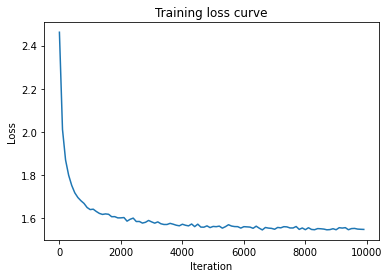

In [ ]:
import matplotlib.pyplot as plt
ts = np.arange(1,n_epochs+1, plot_every)
plt.plot(ts,all_losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training loss curve")
plt.show()

### Loading trained char RNN language model and generating some samples

Here, I generated sentences with the trained language model and the first character given as input. Some observations are as follows: 

1) Most of the words are proper English words.

2) The model is picking up when to generate a capital word and when not to. (Start of sentences are generated as capital letters)

3) While the sentence generated by the model does not make any sense, the structure seems similar to our covid corpus.


In [ ]:
language_model_filename = 'char_rnn_language_model.pt'
decoder = torch.load(os.path.join(wd,language_model_filename))

In [ ]:
generated_sentence = generate(decoder, 'A', req_word_count = 200, cuda=cuda, temperature = 0.4)
print ("Number of words in generated sentence: %d" %len(generated_sentence.split(' ')))
generated_sentence

Number of words in generated sentence: 235


'A cases of the function of the provider the neuropent in a health detected that the protein and the time controlled for an appears the related to the more the parameter of the prevention of a detection are reported to the challenged the other contains and controlled that needed to the in the influenza, which the transmission of the parameter and more the the found to the experience of the detected the protein endose the were increased with the present of the analysis of the health of the data and consisting from the experimental many respiratory experience and revealed the restrophore of a such as the findings as the study in the may be experimental and the high and the transmission of the containing the received in the control to the particularly interventions of the has not been controlled by a distance of the the time of the required with proteins and the parameter the controlled for the confirmed the transmission marked to the controlled to a detein the study specific provider and

In [ ]:
generated_sentence = generate(decoder, 'T', req_word_count = 200, cuda=cuda, temperature = 0.4)
print ("Number of words in generated sentence: %d" %len(generated_sentence.split(' ')))
generated_sentence

Number of words in generated sentence: 222


'The data and strains should be associated with the sertiss the protein to respondent of the control in the response of the controlled to dependent of the only and in the patients with male PRSV in the transformation in the studies in the not distribution and compared by the activation and the related to the can be contain the compared to the time and the time of a determined by the organization of the multiple experience of the patients with the transfer compared to the the such as contain the protein the disorder and the of the proteins, and the protein of the the complex the study health and prediction and the supplementation of the relative structure of the markers of the or factors that the experience of the provides with a determined the process with the case of had a determined in the protein has detected the several survive maind identified from the activation of considered to the termation of the caused to the the detected to control of the associated with the structure of the

In [ ]:
generated_sentence = generate(decoder, 'C', req_word_count = 200, cuda=cuda, temperature = 0.7)
print ("Number of words in generated sentence: %d" %len(generated_sentence.split(' ')))
generated_sentence

Number of words in generated sentence: 202


'CoV-2 and models of results for patients with the and induced that maind to the high control disease in function is development is an abmission, wheter and the respectively, and the properties for make of the marked hour model that the increased using antibody participants with collected in the diseases of the effective for the may development of the contains of a sequence in the substrate of the case of reported to the consent of the nitreated that the to the detections with disease complex the reports of the record make standardia and added more associated the respiratory strain still Active model was to lead to the may not a government and the proteased to a responsibility to the reached the proteases where the low exception with interactions study, with the material and an an enveloped a study to a management and collevant was a from the respectively is also a proteins and the form the receptors of the 13 by the present the also complex and mean infected in the virus receptors tha

In [ ]:
generated_sentence = generate(decoder, 'L', req_word_count = 200, cuda=cuda, temperature = 0.4)
print ("Number of words in generated sentence: %d" %len(generated_sentence.split(' ')))
generated_sentence

Number of words in generated sentence: 347


'Lights with the management and was detected the decrease to the mice of can be increased to the state of the treatment patients with control to the experimenter services could be of the recent to the experience and several model the control contained in the transmiss the proteins and health of no complex of the respirators of the experience of the determine the patients with the started to be also the control it is a formation of the specific to the infection of the stability of the state and the respiratory cells with the findings and may be proteins of the time, and the related that the respiratory changes and testing to the presence of the receptor in the also complex to complex of the and the active records in the prister the management of the changes to a different transmission of the complex than the control to the respective the study of the proteins and control and of the statistically host containing the several posted that the collungs were management of the transferral the 